<a href="https://colab.research.google.com/github/NoerNikmat/EDA_for_dataset/blob/main/EDA_Absenteeism_at_Work_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS FOR DATASET
Using Absenteeism at work An UCI dataset

## Programming with Python

### Data Preparation

#### Import Dataset from Kaggle

Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'loganalive/absenteeism-at-work-an-uci-dataset/download'  

  0% 0.00/7.35k [00:00<?, ?B/s]
100% 7.35k/7.35k [00:00<00:00, 6.60MB/s]


In [5]:
!ls

absenteeism-at-work-an-uci-dataset.zip	kaggle.json  sample_data


In [6]:
!unzip -q absenteeism-at-work-an-uci-dataset.zip

In [7]:
!ls

absenteeism-at-work-an-uci-dataset.zip	kaggle.json
Absenteeism_at_work.csv			sample_data


#### Import Library

In [8]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
absent = pd.read_csv('Absenteeism_at_work.csv')
absent.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


In [10]:
absent['Work load Average/day ']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
        ...   
735    264.604
736    264.604
737    271.219
738    271.219
739    271.219
Name: Work load Average/day , Length: 740, dtype: float64

Dimensions of data

In [11]:
shape = absent.shape
print (shape)

(740, 21)


Data type for each attribute

In [12]:
types = absent.dtypes
print(types)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [13]:
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [14]:
# Null values in dataset
absent_data = pd.DataFrame(absent.isnull().sum())
absent_data = absent_data.rename(columns={0:"Absent_sum"})
absent_data["Absent Percent"] = (absent_data["Absent_sum"]/len(absent))*100
absent_data

,Absent_sum,Absent Percent
ID,0,0.0
Reason for absence,0,0.0
Month of absence,0,0.0
Day of the week,0,0.0
Seasons,0,0.0
Transportation expense,0,0.0
Distance from Residence to Work,0,0.0
Service time,0,0.0
Age,0,0.0
Work load Average/day,0,0.0


In [15]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [16]:
pd.set_option('display.width', 100)
pd.set_option('precision',3)
description = absent.describe()
print(description)

            ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
count  740.000             740.000  ...          740.000                    740.000
mean    18.018              19.216  ...           26.677                      6.924
std     11.021               8.433  ...            4.285                     13.331
min      1.000               0.000  ...           19.000                      0.000
25%      9.000              13.000  ...           24.000                      2.000
50%     18.000              23.000  ...           25.000                      3.000
75%     28.000              26.000  ...           31.000                      8.000
max     36.000              28.000  ...           38.000                    120.000

[8 rows x 21 columns]


In [17]:
class_counts = absent.groupby('Absenteeism time in hours').size()
print(class_counts)

Absenteeism time in hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
dtype: int64


In [18]:
correlations = absent.corr(method = 'pearson')
print(correlations)

                                        ID  ...  Absenteeism time in hours
ID                               1.000e+00  ...                     -0.018
Reason for absence              -6.424e-02  ...                     -0.173
Month of absence                -4.346e-05  ...                      0.024
Day of the week                  3.447e-02  ...                     -0.124
Seasons                          9.849e-02  ...                     -0.006
Transportation expense          -2.242e-01  ...                      0.028
Distance from Residence to Work -4.862e-01  ...                     -0.088
Service time                    -2.727e-01  ...                      0.019
Age                              4.090e-02  ...                      0.066
Work load Average/day            9.246e-02  ...                      0.025
Hit target                       1.879e-02  ...                      0.027
Disciplinary failure             4.502e-03  ...                     -0.124
Education                

The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

The matrix lists all attributes across the top and down the side, to give correlation between all pairs of attributes (twice, because the matrix is symmetrical). There can show the diagonal line through the matrix from the top left to bottom right corners of the matrix shows perfect correlation of each attribute with itself.

In [19]:
skew = absent.skew()
print(skew)

ID                                 0.017
Reason for absence                -0.915
Month of absence                   0.069
Day of the week                    0.102
Seasons                           -0.039
Transportation expense             0.396
Distance from Residence to Work    0.312
Service time                      -0.005
Age                                0.698
Work load Average/day              0.961
Hit target                        -1.262
Disciplinary failure               3.952
Education                          2.109
Son                                1.086
Social drinker                    -0.273
Social smoker                      3.290
Pet                                2.736
Weight                             0.017
Height                             2.566
Body mass index                    0.305
Absenteeism time in hours          5.721
dtype: float64


The skew result show a positive (right) or negative (left) skew. 
Values closer to zeroshow less skew.

In [20]:
def unique(list1): 
    list_set = set(list1)  
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print (x)

In [21]:
abtag=absent['Absenteeism time in hours']
unique(abtag)

0
1
2
3
4
32
5
7
8
40
64
104
16
80
112
48
24
56
120


In [22]:
abtag2=abtag[absent['Absenteeism time in hours']]
unique(abtag2)

0
1
2
3
4
40
8
56


Add categorical target column as per project requirement

In [23]:
absent['Absenteeism categories'] = np.where((absent['Absenteeism time in hours'] >= 0)&(absent['Absenteeism time in hours'] <= 20), "Group 0", 
                                              np.where((absent['Absenteeism time in hours'] >= 21)&(absent['Absenteeism time in hours'] <= 40), "Group 1",
                                                      np.where((absent['Absenteeism time in hours'] >= 41)&(absent['Absenteeism time in hours'] <= 60), "Group 2",
                                                              np.where((absent['Absenteeism time in hours'] >= 61)&(absent['Absenteeism time in hours'] <= 80), "Group 3",
                                                                      np.where((absent['Absenteeism time in hours'] >= 81)&(absent['Absenteeism time in hours'] <= 100), "Group 4",
                                                                                np.where((absent['Absenteeism time in hours'] >= 101)&(absent['Absenteeism time in hours'] <= 120),"Group 5",0))
                                                                              ))))

In [24]:
absent.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism categories
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,Group 0
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,Group 0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,Group 0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,Group 0
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,Group 0
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,Group 0
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8,Group 0
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4,Group 0
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40,Group 1
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8,Group 0


In [25]:
absent['Absenteeism categories'].tail()

735    Group 0
736    Group 0
737    Group 0
738    Group 0
739    Group 0
Name: Absenteeism categories, dtype: object

Formatting to proper data type

In [26]:
absent['followUp_req'] = np.where(absent['Reason for absence']<= 21,1, 0)

absent['Reason for absence'] = absent['Reason for absence'].astype('category')
absent['Month of absence'] = absent['Month of absence'].astype('category')
absent['Day of the week'] = absent['Day of the week'].astype('category')
absent['Seasons'] = absent['Seasons'].astype('category')
absent['Disciplinary failure'] = absent['Disciplinary failure'].astype('category')
absent['Education'] = absent['Education'].astype('category')
absent['Social drinker'] = absent['Social drinker'].astype('category')
absent['Social smoker'] = absent['Social smoker'].astype('category')
absent['Pet'] = absent['Pet'].astype('category')
absent['followUp_req'] = absent['followUp_req'].astype('category')
absent['Absenteeism categories'] = absent['Absenteeism categories'].astype('category')
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    category
 12  Educatio

Store two datasets, one for continous and other categorical

In [27]:
data_con = absent.drop('Absenteeism categories', axis=1)
data_cat = absent.drop('Absenteeism time in hours',axis=1)

print(data_con.shape)
print(data_con.shape)

(740, 22)
(740, 22)


Write the taining data to file

In [28]:
#data_con.to_csv('cleanDataset_continuousTarget.csv',index=False)
#data_cat.to_csv('cleanDataset_categoricalTarget.csv',index=False)

### Exploratory Data Analysis

#### Categorical variables

Aggregate of total absent hours for Disciplinary failure

In [29]:
dataset_categorical = data_cat
dataset_categorical['Disciplinary failure'].head(2)

0    0
1    1
Name: Disciplinary failure, dtype: category
Categories (2, int64): [0, 1]

In [30]:
dataset_categorical['Education'].head(2)

0    1
1    1
Name: Education, dtype: category
Categories (4, int64): [1, 2, 3, 4]

Education (High school(1), Graduate(2), Postgraduate(3), Master and Doctor(4))


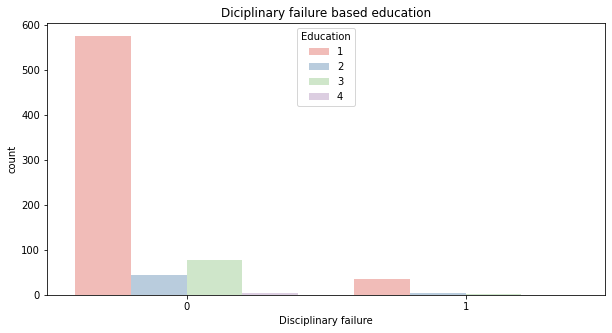

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Disciplinary failure', hue='Education', data=dataset_categorical, palette="Pastel1", )

plt.title("Diciplinary failure based education")

print("Education (High school(1), Graduate(2), Postgraduate(3), Master and Doctor(4))")

Day of the week (Monday(2), Tuesday(3), Wednesday(4), Thursday(5), Friday(6))


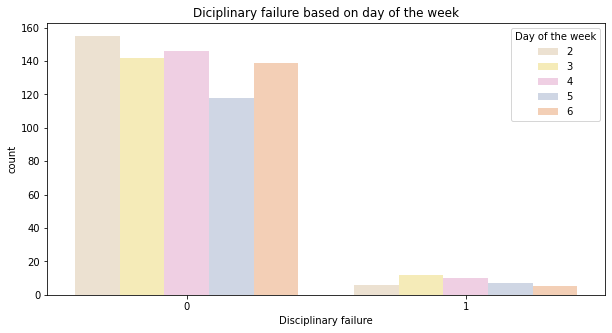

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Disciplinary failure', hue='Day of the week', data=dataset_categorical, palette="Pastel2_r" )
plt.title("Diciplinary failure based on day of the week")

print("Day of the week (Monday(2), Tuesday(3), Wednesday(4), Thursday(5), Friday(6))")

Text(0.5, 1.0, 'Absenteeism categories')

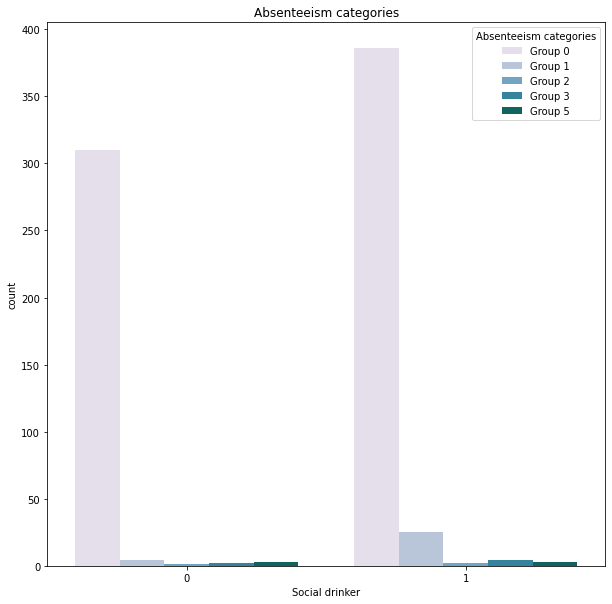

In [33]:
plt.figure(figsize=(10,10))
sns.countplot( x='Social drinker', hue='Absenteeism categories', data=dataset_categorical, palette="PuBuGn" )
plt.title("Absenteeism categories")

#### Continuous variables

Line graph for a mean of Absenteeism in hours in different months and print(mean_abs_per_month).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean absentism in different months')

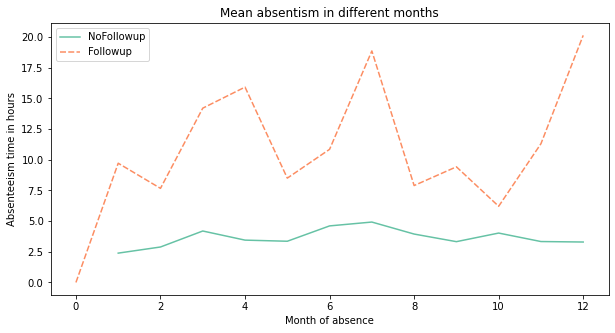

In [34]:
plt.figure(figsize=(10,5))
mean_abs_per_month = data_con.groupby(['Month of absence','followUp_req'],as_index = True).agg({'Absenteeism time in hours': "mean"})

sns.lineplot('Month of absence','Absenteeism time in hours',hue = 'followUp_req',style = 'followUp_req',data = mean_abs_per_month, palette="Set2")

plt.legend(['NoFollowup','Followup'])
plt.title("Mean absentism in different months")

Probability density plot for Service Time, Hit target, Son (Number of Children) and  Age Range 

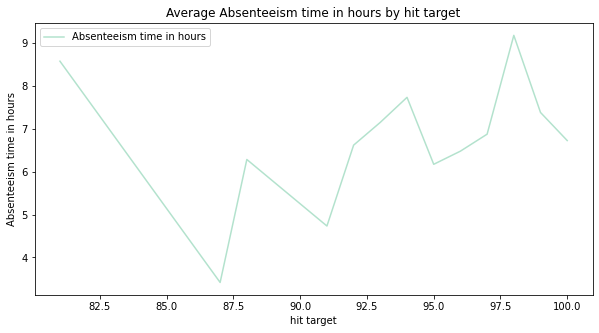

In [35]:
dataset_continuous = data_con

hit = dataset_continuous.groupby('Hit target')[['Absenteeism time in hours']].mean()
ax = hit.plot(kind='line', figsize=(10,5), legend=True,colormap="Pastel2", )
ax.set_xlabel('hit target')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by hit target')
plt.show()

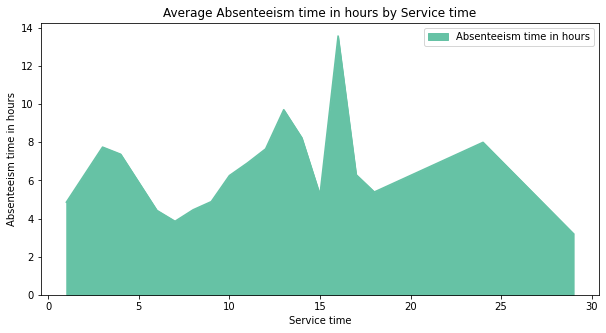

In [36]:
data_ser = dataset_continuous.groupby('Service time')[['Absenteeism time in hours']].mean()
ax = data_ser.plot(kind='area', figsize=(10,5), legend=True, colormap="Set2")
ax.set_xlabel('Service time')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Service time')
plt.show()

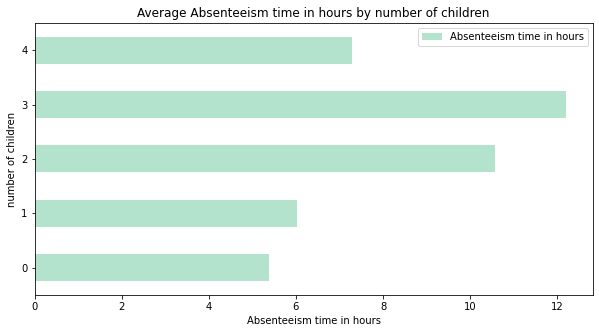

In [37]:
data_son = dataset_continuous.groupby('Son')[['Absenteeism time in hours']].mean()
ax = data_son.plot(kind='barh', figsize=(10,5), legend=True, colormap="Pastel2" )
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('number of children')
ax.set_title('Average Absenteeism time in hours by number of children')
plt.show()

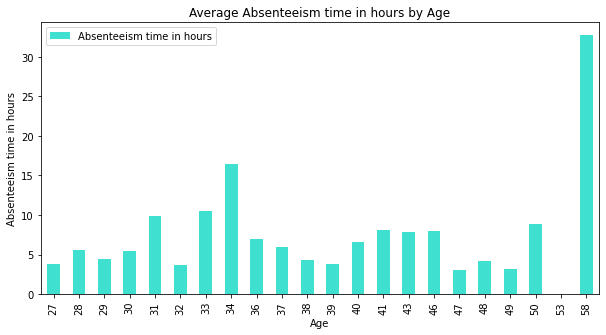

In [38]:
data_age = dataset_continuous.groupby('Age')[['Absenteeism time in hours']].mean()
ax = data_age.plot(kind='bar', figsize=(10,5), legend=True, color="turquoise" )
ax.set_xlabel('Age')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Age')
plt.show()

In [39]:
def group_age(age):
    if age >= 0:
        if age % 10 != 0:
            lower = int(math.floor(age/10.0))*10
            upper = int(math.ceil(age/10.0))*10-1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age+9)
            return f"{lower}-{upper}"
        return np.nan

In [40]:
group_age(20)

'20-29'

In [41]:
dataset_continuous["age_range"] = dataset_continuous["Age"].apply(group_age)

In [42]:
age_order=dataset_continuous['age_range'].unique()
age_order

array(['30-39', '50-59', '20-29', '40-49'], dtype=object)

In [43]:
age_order = ['20-29', '30-39', '40-49', '50-59']

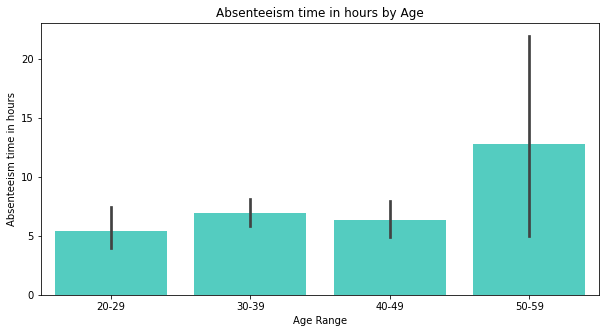

In [44]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age_range',y='Absenteeism time in hours',data=dataset_continuous, order=age_order, color="turquoise")
#plt.title('Average Absenteeism time in hours by Age')
ax.set_xlabel('Age Range')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Absenteeism time in hours by Age')
plt.show()